# Seaborn Tutorial

## Seaborn vs Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

see plt.style.available for a list of available styles (online reference)


see:

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html




In [7]:
plt.style.use('classic')

In [2]:
rng = np.random.RandomState(0)

In [3]:
x = np.linspace(0, 10, 250)

In [4]:
y = np.cumsum(rng.randn(250, 6), 0)

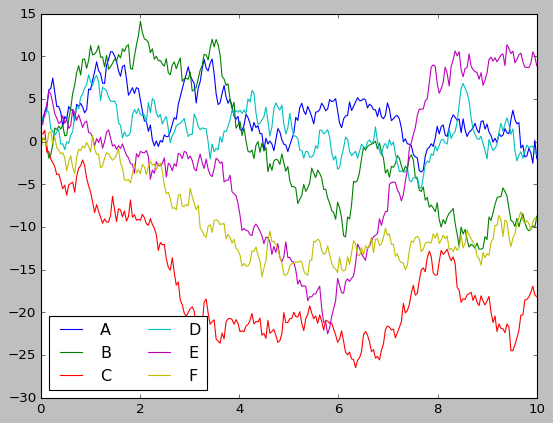

In [8]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='best')

Seaborn is a powerful data visualization library in Python that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Some advantages of using Seaborn include:

**Flexibility with Matplotlib Integration**: While Seaborn simplifies many aspects of plotting, it is built on top of Matplotlib, allowing users to leverage the full customization capabilities of Matplotlib when needed. This provides a balance between simplicity and flexibility.

**Grids and Faceting**: Seaborn supports grid-based layouts and faceting, making it easy to create multi-plot grids and visualize relationships across multiple variables.

**Statistical Estimation**: Seaborn integrates statistical estimation and aggregation functions directly into the plotting functions. This allows for quick and easy creation of plots with statistical insights, such as adding regression lines to scatter plots or confidence intervals to bar plots.

In [9]:
import seaborn as sns

By calling sns.set(), you apply the default Seaborn theme and styling to your plots.

In [10]:
sns.set()

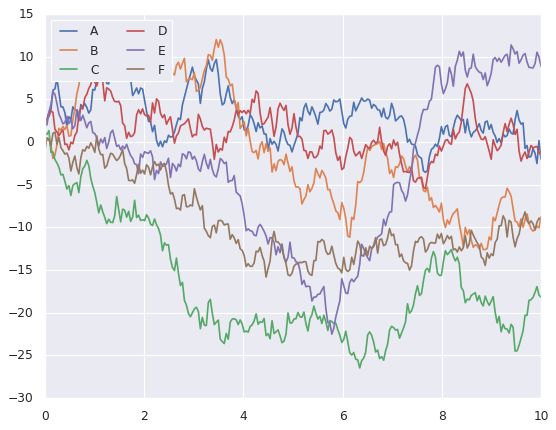

In [11]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Exploring Seaborn Plots

In [12]:
iris = sns.load_dataset("iris")


The Iris dataset is a well-known dataset in the field of machine learning and statistics. It was introduced by the British biologist and statistician Ronald A. Fisher in 1936. The dataset consists of measurements of various features of three species of iris flowers: Setosa, Versicolor, and Virginica. Each species has 50 samples, making a total of 150 samples in the dataset.

The four features measured for each sample are:

**Sepal Length**: The length of the iris flower's sepal (the outermost whorl of a flower). It is measured in centimeters.
**Sepal Width**: The width of the iris flower's sepal, also measured in centimeters.
**Petal Length**: The length of the iris flower's petal (the innermost whorl of a flower). It is measured in centimeters.
**Petal Width**: The width of the iris flower's petal, also measured in centimeters.

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
setosa=iris.loc[iris.species== "setosa"]
virginica = iris.loc[iris.species == "virginica"]

## Histogram and Density Plots

<Axes: ylabel='Frequency'>

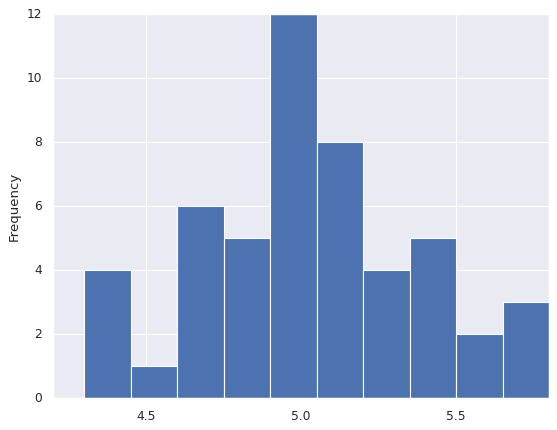

In [16]:
setosa.sepal_length.plot.hist()

The resulting plot will display a hexbin representation, where hexagonal bins are used to represent the density of points in the scatter plot. Darker regions indicate higher point density. This type of plot is useful for visualizing the distribution and relationship between two variables.

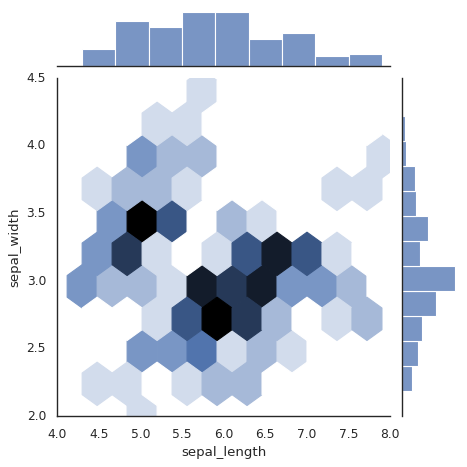

In [18]:
with sns.axes_style('white'):
    sns.jointplot(
        data= iris, x="sepal_length",
        y="sepal_width", kind='hex')

To create a matrix of scatterplots for different pairs of variables. The hue parameter is used to color the points based on a categorical variable, which can help distinguish different groups.

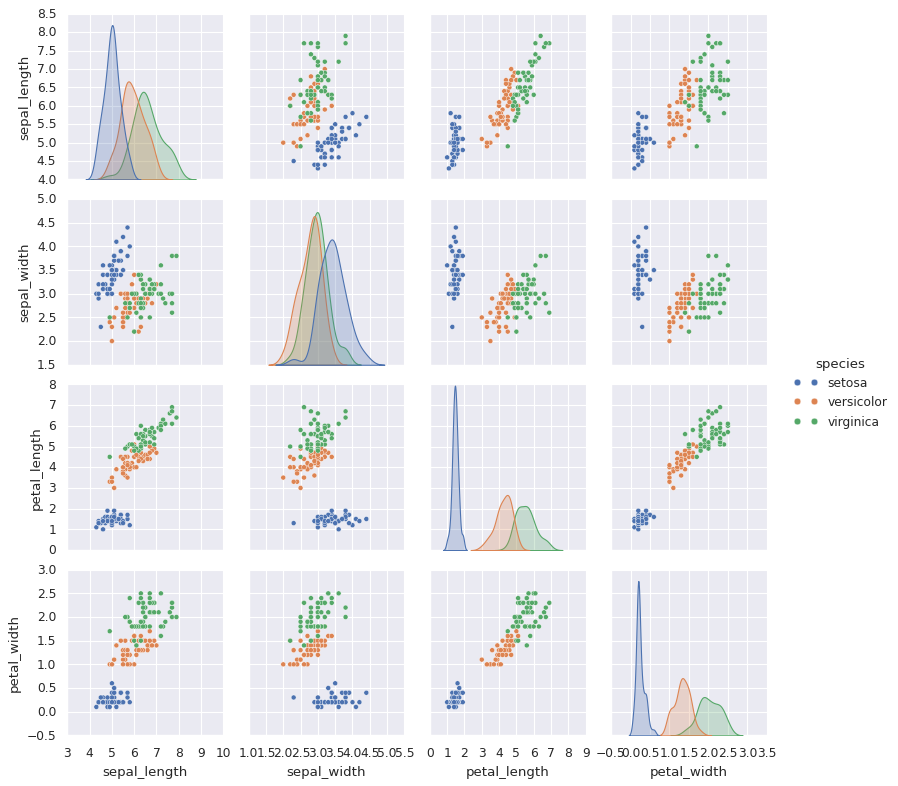

In [19]:
sns.pairplot(iris, hue='species')

In [20]:
tips=sns.load_dataset('tips')

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips["tip_percent"]=tips[
    "tip"]*100/tips["total_bill"]

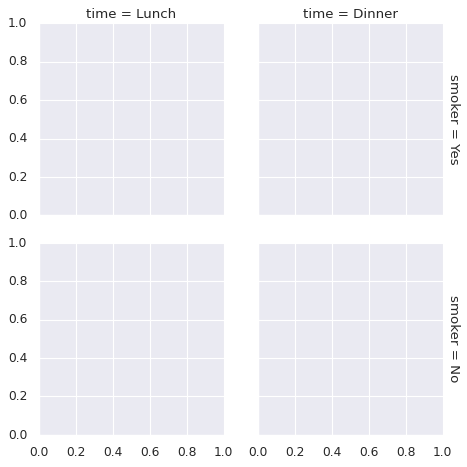

In [23]:
grid=sns.FacetGrid(
    tips, row="smoker",col="time",
    margin_titles=True)

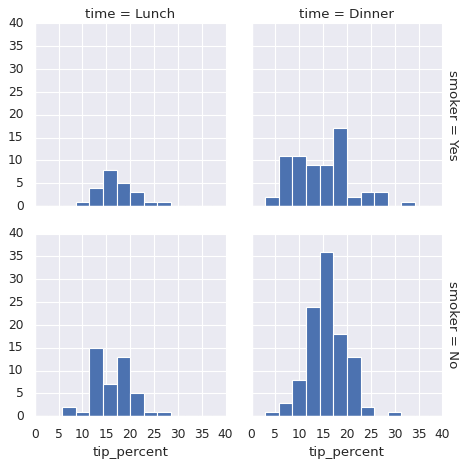

In [28]:
grid.map(
    plt.hist, "tip_percent",
    bins=np.linspace(0,40,15))
plt.show()

## Box Plots

In a box plot, **outliers** are data points that fall significantly beyond the whiskers of the plot. Whiskers are lines that extend from the box and typically represent the range within which most of the data points lie. Points beyond the whiskers are considered outliers and are often plotted individually.

In [35]:
tips[tips['day']=='Sat']['total_bill'].describe()

count    87.000000
mean     20.441379
std       9.480419
min       3.070000
25%      13.905000
50%      18.240000
75%      24.740000
max      50.810000
Name: total_bill, dtype: float64

Mathematically, outliers in a box plot are often identified using the **interquartile** **range** (IQR) and the concept of "fences." The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data. The **fences** are used to define a range within which most of the data points are expected to lie.

Here's a step-by-step explanation:

Calculate the Interquartile Range (IQR):

IQR=Q3−Q1

Calculate the Lower Fence (LF) and Upper Fence (UF):

LF=Q1−1.5×IQR

UF=Q3+1.5×IQR

Identify Outliers:

Any data point below the Lower Fence or above the Upper Fence is considered an outlier.

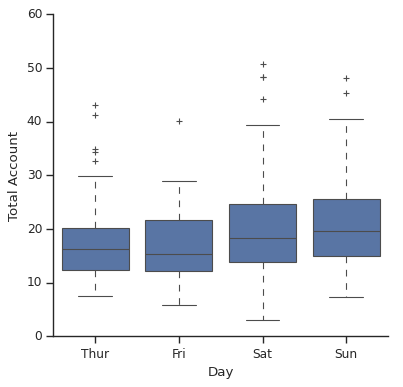

In [36]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill",
                    data=tips, kind="box")
g.set_axis_labels("Day", "Total Account")

## A scatter plot along with univariate histograms on the margins

The marginal histograms on the top and right represent the distribution of "total_bill" and "tip" separately.
The regression line in the scatter plot is fitted using linear regression, showing the overall trend between the two variables.

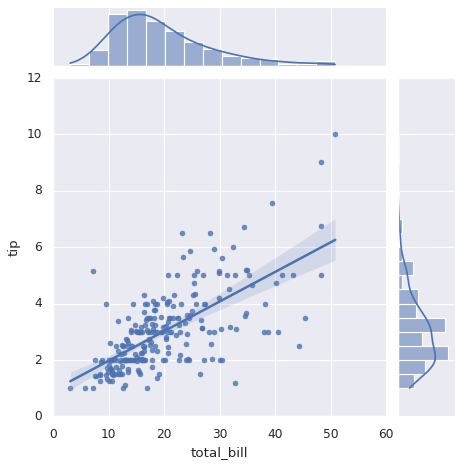

In [30]:
sns.jointplot(x="total_bill",
              y="tip",
              data=tips,
              kind='reg')

## Bar Plots

In the context of the "tips" dataset from Seaborn, the "size" column represents the size of the dining party or group at a restaurant. Each row in the dataset corresponds to a bill at a restaurant, and the "size" column indicates the number of people in the dining party associated with that particular bill.

<Axes: xlabel='size'>

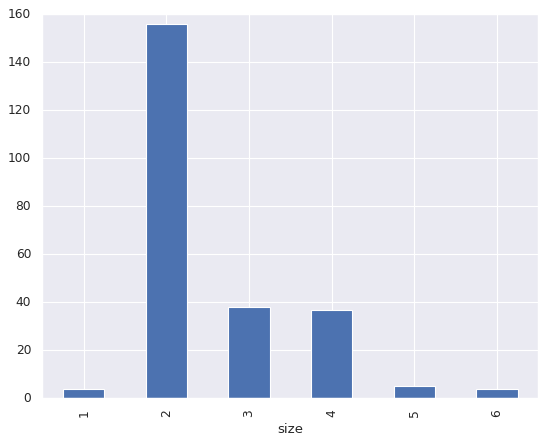

In [39]:
tips.groupby('size')['total_bill'].count().plot.bar()